In [1]:
#accessing netcdf files from Hector's folders
import os, glob, sys
sys.path.append("//nobackup//amondal//Python//Hector_Python_Scripts")
sys.path.append("//nobackup/amondal//Python//mit_geos_analysis")
#playing with netcdf - xarray
import numpy as np
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import dask_ndfilters
# How about visualization?
%matplotlib inline
import xrscipy.signal as dsp
import xrft
import scipy.signal as scp
import netCDF4
import xgcm
from netCDF4 import Dataset
import time as tm
from xmitgcm import open_mdsdataset
import time as tm
import pylab as plt
from llcmap_bi_split import LLCMap_bi_split
from face_connections import face_connections
from llcmap_nea_split import LLCMap_nea_split
from timeline_MITgcm import timeline
from datetime import datetime, timedelta
import importlib
from GetNCDataSet import getMITNCDataSet
from MIT_xr_cwt_dateloc_fol import loadMITData
from MITllc2160Depth import *



from dask.distributed import Client
client = Client(memory_limit='90GB',n_workers = 40, threads_per_worker=1)

Coordinates for this section:

30N - 42N
40W - 65W
Mar 1 - Jun 1

In [17]:
zlayerToDepth(26)

171.825

In [13]:
hbl = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month/', 'KPPhbl', 0,0 )

Time combined dataset has been opened.
I concatenated the first Z-layer


In [14]:
hblc = hbl.KPPhbl.compute()

Exception in thread Profile:
Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
    d = state["children"][ident]
KeyError: 'handle_free_keys;/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/worker.py;1798'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 274, in _watch
    process(frame, None, recent, omit=omit)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 119, in process
  

In [16]:
a = hblc.max(dim=['lat','lon'])

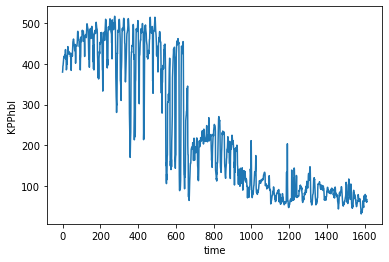

In [17]:
%matplotlib inline
a.plot()

In [5]:
hblcm = hblc.mean(dim=['lat','lon'])

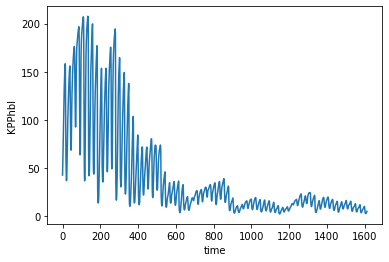

In [6]:
%matplotlib inline
hblcm.plot()

In [ ]:
hblcv = hblc.var(dim=['lat','lon'])

In [ ]:
%matplotlib inline
hblcv.plot()

In [2]:
T = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month/', 'Theta', 26, 26)
W = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month/', 'W', 26,26)
#hbl = getMITNCDataSet('/nobackup/amondal/NCData/20211116_QTprime_openocean_3month/', 'KPPhbl', 0,0 )


Exception in thread Profile:
Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
    d = state["children"][ident]
KeyError: 'cleandoc;/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/inspect.py;744'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 274, in _watch
    process(frame, None, recent, omit=omit)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 119, in process
    "description": info_frame(frame)

Time combined dataset has been opened.
I concatenated the first Z-layer
Time combined dataset has been opened.
I concatenated the first Z-layer


In [6]:
hblc = hbl.KPPhbl.compute()


In [4]:
Tc = T.compute()
Wc = W.compute()

Exception in thread Profile:
Exception in thread Profile:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
    d = state["children"][ident]
KeyError: 'transition_released_forgotten;/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/worker.py;2436'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/pr

Important note - xrft does not handle nans. So you cannot analyze NANS in your analysis.

So how do we detrend? Probably just use detrend_type constant in space right?

In [13]:
#Tp = xrft.detrend(Tc.Theta, dim='lat', detrend_type = 'constant')
#Wp = xrft.detrend(Wc.W, dim='lat', detrend_type = 'constant')
#Tprime = xrft.detrend(Tp, dim='lon',detrend_type='constant')
#Wprime = xrft.detrend(Wp,dim='lon', detrend_type='constant')

Notes based on what Brian mentioned

1. The size of your longitude values is odd - pick an even number of degrees next time
2. You need to be careful with the negatively valued frequencies

In [5]:
Tw = xrft.xrft.fft(Tc.Theta, dim='time', detrend = 'constant', window='tukey', true_amplitude='True' )
That = xrft.xrft.fft(Tw, dim=['lat','lon'],detrend='constant', window='tukey', true_amplitude='True')
Ww = xrft.xrft.fft(Wc.W, dim='time', real_dim='time', detrend = 'constant', window='tukey', true_amplitude='True')
What = xrft.xrft.fft(Ww, dim=['lat','lon'],detrend='constant', window='tukey', true_amplitude='True')

In [ ]:
That

In [6]:
Q= What*np.conjugate(That)

#ADD IN NORMALIZATION !!!!

In [10]:
#Qr = np.real(Q)

In [7]:
from spectral_analysis_code import *
Qiso26 = isotropize(Q, ['freq_lat','freq_lon'], 'freq_time')
#Qiso27 = isotropize(Q.isel(Zlayers=1), ['freq_lat','freq_lon'], 'freq_time')
#Qiso28 = isotropize(Q.isel(Zlayers=2), ['freq_lat','freq_lon'], 'freq_time')
#Qiso29 = isotropize(Q.isel(Zlayers=3), ['freq_lat','freq_lon'], 'freq_time')
#Qiso30 = isotropize(Q.isel(Zlayers=4), ['freq_lat','freq_lon'], 'freq_time')

In [10]:
Qiso26

<xarray.DataArray (freq_time: 1104, kr: 135)>
array([[-9.00764335e-01,  2.66528515e+00, -1.41316207e+01, ...,
         2.77384538e-02,  3.13711812e-02,  2.24856231e-02],
       [ 1.75813726e+01, -1.02029269e+02, -1.38665017e+02, ...,
         2.26169443e-01,  1.45669829e-01,  1.23828637e-01],
       [ 3.71073184e+00, -7.05668361e+00, -3.68103053e+01, ...,
         1.58146768e-01,  1.80632783e-01,  1.25310247e-01],
       ...,
       [ 2.85506295e-07,  3.62688347e-05,  5.81534217e-06, ...,
        -8.67533065e-06,  1.44044873e-05,  2.71043636e-05],
       [ 1.25708690e-07, -1.53751122e-05, -1.21745233e-05, ...,
        -3.99474159e-05, -1.01147233e-05, -9.24826810e-07],
       [-1.16273414e-05, -2.44960346e-05, -4.98044765e-05, ...,
        -1.57626289e-05, -1.71696162e-05, -2.05636082e-05]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 0.0004529 0.0009058 ... 0.4991 0.4995
  * kr         (kr) float64 0.04622 0.1387 0.2311 0.3235 ... 12.25 12.34 12.43

In [10]:
Qiso26.freq_time[1] - Qiso26.freq_time[0]

<xarray.DataArray 'freq_time' ()>
array(0.0004529)

In [12]:
# if you used true amplitude then you don't need this
norm26 = (Qiso26.freq_time[1] - Qiso26.freq_time[0])*(Qiso26.kr[1]-Qiso26.kr[0])
norm27 = (Qiso27.freq_time[1] - Qiso27.freq_time[0])*(Qiso27.kr[1]-Qiso27.kr[0])
norm28 = (Qiso28.freq_time[1] - Qiso28.freq_time[0])*(Qiso28.kr[1]-Qiso28.kr[0])

In [8]:
Qriso26 = np.real(Qiso26)#*norm26
#Qriso27 = np.real(Qiso27)*norm27
#Qriso28 = np.real(Qiso28)*norm28
#Qriso29 = np.real(Qiso29)
#Qriso30 = np.real(Qiso30)
#normalize here once you find out what the K and omega increments are

In [9]:
Qriso26 = xr.DataArray(data=Qriso26.values, dims=['freq_time', 'K'], coords=[Qriso26.freq_time, Qriso26.kr], name='$\hat{W}\' \hat{T}\'$')

In [10]:
Qriso26.rename('$\hat{W}\' \hat{T}\'$')

<xarray.DataArray "$\\hat{W}' \\hat{T}'$" (freq_time: 1104, K: 135)>
array([[-9.00764335e-01,  2.66528515e+00, -1.41316207e+01, ...,
         2.77384538e-02,  3.13711812e-02,  2.24856231e-02],
       [ 1.75813726e+01, -1.02029269e+02, -1.38665017e+02, ...,
         2.26169443e-01,  1.45669829e-01,  1.23828637e-01],
       [ 3.71073184e+00, -7.05668361e+00, -3.68103053e+01, ...,
         1.58146768e-01,  1.80632783e-01,  1.25310247e-01],
       ...,
       [ 2.85506295e-07,  3.62688347e-05,  5.81534217e-06, ...,
        -8.67533065e-06,  1.44044873e-05,  2.71043636e-05],
       [ 1.25708690e-07, -1.53751122e-05, -1.21745233e-05, ...,
        -3.99474159e-05, -1.01147233e-05, -9.24826810e-07],
       [-1.16273414e-05, -2.44960346e-05, -4.98044765e-05, ...,
        -1.57626289e-05, -1.71696162e-05, -2.05636082e-05]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 0.0004529 0.0009058 ... 0.4991 0.4995
  * K          (K) float64 0.04622 0.1387 0.2311 0.3235 ... 12.25 12.34 12.43

NORM = $d\omega * N$

N = length of original time series

Text(0.5, 0, 'K')

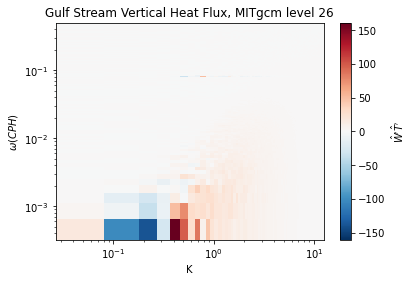

In [12]:
%matplotlib inline
fig, ax = plt.subplots()
Qriso26[1:-1].plot(xscale='log',yscale='log')
ax.set_title('Gulf Stream Vertical Heat Flux, MITgcm level 26')
ax.set_ylabel('$\omega (CPH)$')
ax.set_xlabel('K')
# I think to label the color bar you have to remake the xarray dataarray and then add the name parameter at the end

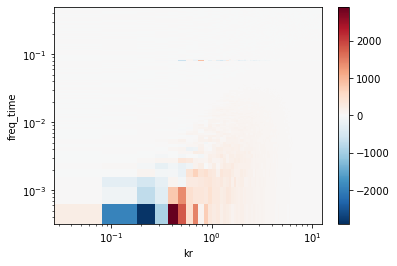

In [15]:
%matplotlib inline
Qriso27[1:-1].plot(xscale='log',yscale='log')

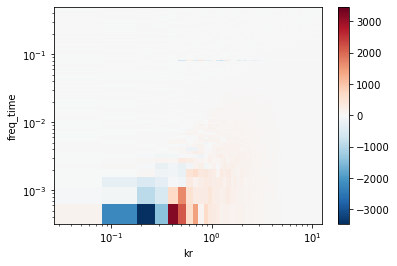

In [16]:
%matplotlib inline
Qriso28[1:-1].plot(xscale='log',yscale='log')

In [11]:
from spectral_analysis_code import *
Qiso30 = isotropize(Q.isel(Zlayers=0), ['freq_lat','freq_lon'], 'freq_time')

In [13]:
Qiso31 = isotropize(Q.isel(Zlayers=1), ['freq_lat','freq_lon'], 'freq_time')

In [14]:
Qriso30 = np.real(Qiso30)
Qriso31 = np.real(Qiso31)

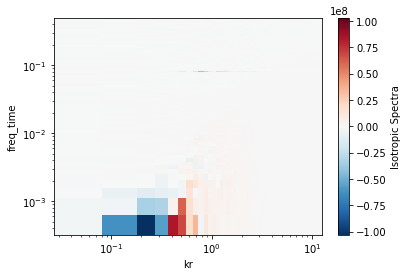

In [18]:
%matplotlib inline
Qriso30[1:-1].plot(xscale='log',yscale='log')

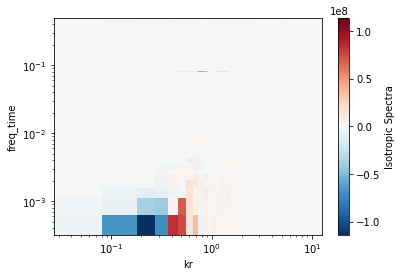

In [19]:
%matplotlib inline
Qriso31[1:-1].plot(xscale='log',yscale='log')

In [49]:
# this is a stand in until you figure out Joe's Symlog stuff
def symlog(xa):
    xapos = xr.where(xa > 1, xa, 1)
    xaneg = xr.where(xa < -1, xa, -1)
    lxapos = xr.apply_ufunc(np.log, xapos)
    lxaneg = xr.apply_ufunc(np.log, -1*xaneg)
    symxa = lxapos - lxaneg
    return symxa

In [43]:
sQtiso26 = symlog(Qtiso26)
sQtiso27 = symlog(Qtiso27)

So 12/6 suggestion is to try to understand what's going on with with just 1d spectra. So we'll start with time and then work our way to space and then both.

In [53]:
Q.time

<xarray.DataArray 'time' (time: 2208)>
array([   0,    1,    2, ..., 2205, 2206, 2207])
Dimensions without coordinates: time

In [54]:
Q.assign_coords({"time": Q.time})

<xarray.DataArray (Zlayers: 2, time: 2208, lat: 300, lon: 625)>
array([[[[ 7.70948845e-03,  6.06898132e-03,  5.59438453e-03, ...,
          -4.32244715e-06, -4.42988823e-04, -5.32230491e-04],
         [ 6.75825403e-03,  5.62212308e-03,  5.62337221e-03, ...,
          -5.23556717e-04, -4.85004470e-04, -2.15062520e-04],
         [ 3.46161119e-03,  3.71257689e-03,  4.06777578e-03, ...,
          -2.76570170e-04, -8.55997907e-05,  2.00949774e-04],
         ...,
         [ 3.17410835e-02,  3.18574081e-02,  2.50535512e-02, ...,
           1.53388007e-04,  4.50666668e-05, -1.58891885e-04],
         [ 1.40365973e-02,  2.46078088e-02,  2.81748071e-02, ...,
           1.15993982e-04,  1.04001239e-04, -6.97531175e-05],
         [ 8.31455012e-03,  2.10136448e-02,  2.82697088e-02, ...,
           5.69905111e-05,  1.75014121e-04,  3.33806321e-05]],

        [[ 6.40607880e-03,  5.27954177e-03,  6.50408892e-03, ...,
           2.92403567e-04, -1.10001712e-05,  6.67124364e-05],
         [ 4.08863630e-03,  4.26670365e-03,  6.09788944e-03, ...,
           1.42170329e-04,  2.67374589e-04,  6.94770442e-04],
         [ 2.86432608e-04,  1.30197047e-03,  3.26935312e-03, ...,
          -3.83431349e-04, -3.19184412e-05,  3.32086072e-04],
...
         [-1.23358321e-02, -1.45383838e-02, -2.09065122e-02, ...,
           8.97855269e-04,  1.01990922e-03,  6.65583966e-04],
         [-1.65855726e-02, -1.56385604e-02, -1.75858834e-02, ...,
           9.35237296e-04,  9.50929861e-04,  7.79224018e-04],
         [-9.09767331e-03, -7.76802294e-03, -1.13961706e-02, ...,
           7.16117442e-04,  7.32646704e-04,  7.16029406e-04]],

        [[-1.15181756e-04, -1.95743288e-04, -2.41316656e-04, ...,
          -2.00856746e-04, -2.77945232e-04, -1.42514688e-04],
         [ 1.78991179e-03,  1.16060678e-03,  9.09829114e-04, ...,
           5.65700830e-05, -1.62344923e-04, -2.73900061e-04],
         [ 1.98731359e-03,  9.82814614e-04,  6.80687313e-04, ...,
          -5.41217295e-04, -8.37845782e-04, -9.97822406e-04],
         ...,
         [-1.28865974e-02, -7.23450597e-03, -9.38744251e-03, ...,
           6.92679317e-04,  1.19743435e-03,  7.95085022e-04],
         [-7.53777973e-03, -3.19052090e-03, -2.37773474e-03, ...,
           3.15723384e-04,  8.63070463e-04,  8.38243643e-04],
         [-8.83288874e-03, -1.92710195e-03,  2.76812153e-03, ...,
           3.92008112e-05,  4.37426054e-04,  6.07914439e-04]]]])
Coordinates:
  * lat      (lat) float64 30.0 30.04 30.08 30.12 ... 41.84 41.88 41.92 41.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -40.12 -40.08 -40.04
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 2201 2202 2203 2204 2205 2206 2207
Dimensions without coordinates: Zlayers

In [15]:
Qt = xrft.xrft.fft(Q, dim='time', real_dim='time', detrend = 'linear', window='tukey', true_amplitude='True')

In [16]:
Qt3031 = Qt#Qt for layers 30 and 31
Qt3031_omega = Qt3031.mean(dim=['lat','lon'])

In [17]:
Qt_omega = np.abs(Qt3031_omega)

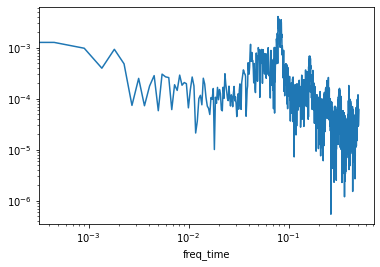

In [45]:
Qt_omega.sel(Zlayers=0).plot(xscale='log', yscale = 'log')

In [ ]:
#No idea if this is reasonable ^^, but there are definitely weird peaks. There is more action happening on the right scales so that much makes sense. 

In [19]:
T = getMITNCDataSet('/nobackup/amondal/NCData/20211103_multicoretest_3month/', 'Theta', 1, 5)
Tc = T.compute()

Time combined dataset has been opened.
I concatenated the first Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer
Time combined dataset has been opened
I concatenated another Z-layer


Exception in thread Profile:
Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
    d = state["children"][ident]
KeyError: 'transition_released_forgotten;/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/worker.py;2436'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 274, in _watch
    process(frame, None, recent, omit=omit)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 119, 

Time combined dataset has been opened
I concatenated another Z-layer


Exception in thread Profile:
Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
Exception in thread Profile:
Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/profile.py", line 115, in process
    d = state["children"][ident]
KeyError: 'transition_generic_released;/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/worker.py;2046'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/nobackup/amondal/.conda/envs/xmitgcm4/lib/python3.10/site-packages/distributed/prof

In [20]:
Tc = Tc.sel(lat=slice(35, 45))
Tp = xrft.detrend(Tc.Theta, dim='lat', detrend_type = 'linear')

In [22]:
Tpomega = xrft.xrft.fft(Tp, dim='time', real_dim='time', detrend = 'linear', window='tukey', true_amplitude='True')

In [23]:
Tpomega_bar = Tpomega.mean(dim=['lat','lon', 'Zlayers'])

In [24]:
Tpomega_bar_abs = np.abs(Tpomega_bar)

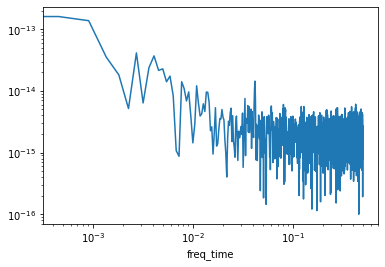

In [25]:
Tpomega_bar_abs.plot(xscale = 'log', yscale = 'log')

In [17]:
Tc.Theta.isel(Zlayers=0, time=0)

<xarray.DataArray 'Theta' (lat: 375, lon: 375)>
array([[18.52941513, 18.52941513, 18.52387619, ..., 17.17543221,
        17.28687096, 17.36539841],
       [18.52375793, 18.52375793, 18.49901772, ..., 17.17926025,
        17.38815689, 17.47924805],
       [18.47663498, 18.47663498, 18.43268776, ..., 17.2299118 ,
        17.50032806, 17.6009655 ],
       ...,
       [ 0.13681561,  0.13681561, -0.10579435, ...,  5.36168385,
         6.02215958,  6.60452318],
       [-0.14354479, -0.14354479, -0.03696107, ...,  5.30365038,
         5.57920742,  5.94111252],
       [ 0.05489781,  0.05489781,  0.22084467, ...,  5.15139866,
         5.24470901,  5.37615442]])
Coordinates:
  * lat      (lat) float64 35.0 35.04 35.08 35.12 ... 49.84 49.88 49.92 49.96
  * lon      (lon) float64 -60.0 -59.96 -59.92 -59.88 ... -45.12 -45.08 -45.04

In [2]:
Q = getMITNCDataSet('/nobackup/amondal/NCData/20210830_RegBal_5day/', 'oceQnet', 0, 0)
Qc = Q.compute()

Time combined dataset has been opened.
I concatenated the first Z-layer


In [36]:
Qc

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 25, time: 120)
Coordinates:
  * lat      (lat) float64 34.0 34.04 34.08 34.12 ... 34.84 34.88 34.92 34.96
  * lon      (lon) float64 -65.0 -64.96 -64.92 -64.88 ... -64.12 -64.08 -64.04
Dimensions without coordinates: time
Data variables:
    oceQnet  (time, lat, lon) float64 324.9 373.6 352.0 ... 200.3 140.8 173.3

In [38]:
Qf = xrft.xrft.fft(Qc.oceQnet, dim='time', real_dim='time', detrend = 'linear', window='tukey', true_amplitude='True')

In [41]:
Qfs = Qf.sum(dim=['lat','lon'])

In [43]:
Qfsa = np.abs(Qfs)

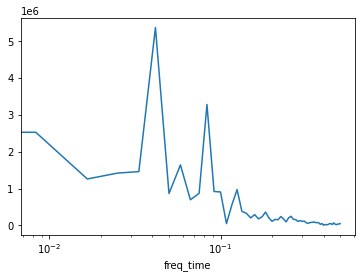

In [45]:
Qfsa.plot(xscale='log')

In [3]:
k0 = 1/0.52
T = 4.
dx = 0.02
x = np.arange(-2*T,2*T,dx)
y = np.cos(2*np.pi*k0*x)
#y[np.abs(x)>T/2]=0.
da = xr.DataArray(y, dims=('x',), coords={'x':x})

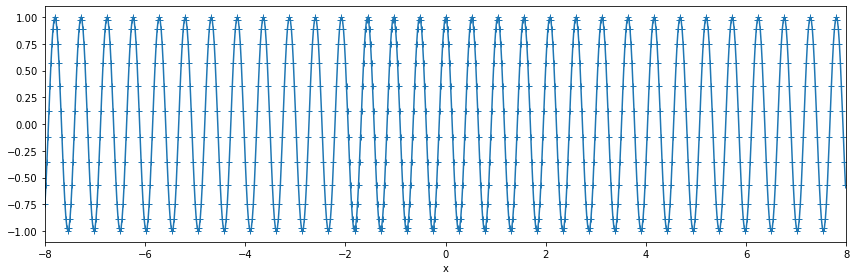

In [4]:
fig, ax = plt.subplots(figsize=(12,4))
fig.set_tight_layout(True)
da.plot(ax=ax, marker='+', label='original signal')
ax.set_xlim([-8,8]);

In [7]:
da_fft = xrft.fft(da,window='tukey') 
da_fft_abs = np.abs(da_fft)

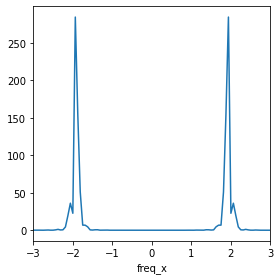

In [10]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(4,4))
da_fft_abs.plot()
fig.set_tight_layout(True)
ax.set_xlim([-3,3]);

 

Inputs:

k,l := horizontal components of the wavenumber vector k with size N and l with size M

E := spectrum with size N x M.


Outputs:
Kr := radial wavenumber
Ispec := isotropic spectrum

In [16]:
#:::::::::::::::::::::::::::::::::::::::::::::::
import math
def calc_ispec(k,l,E):
    """ calculates isotropic spectrum from 2D spectrum """
    dk,dl = k[1]-k[0],l[1]-l[0]
    l,k = np.meshgrid(l,k)
    wv = np.sqrt(k**2 + l**2)
    if k.max()>l.max():
        kmax = l.max()
    else:
        kmax = k.max()
    # create radial wavenumber

    dkr = np.sqrt(dk**2 + dl**2)

    kr =  np.arange(dkr/2.,kmax+dkr,dkr) #you should ask Hector about this line 

    ispec = np.zeros(kr.size)
    #print(ispec.shape)

    #print(kr.shape)
    for i in range(kr.size):
        fkr =  (wv>=kr[i]-dkr/2) & (wv<=kr[i]+dkr/2)
    #    print(fkr.shape)
        dth = math.pi / (fkr.sum()-1)
        ispec[i] = E[fkr].sum() * kr[i] * dth

    return kr, ispec

In [17]:
k = Q30txy[0,:,:].freq_lat.values
l = Q30txy[0,:,:].freq_lon.values
E = Q30txy[0,:,:].values

In [18]:
len(l)

375

In [ ]:
ndim = 'freq_time'
Q30txy.get_index(ndim)

In [ ]:
kr, ispec = calc_ispec(k,l,Q30txy[0,:,:].values)

In [ ]:
ispec

In [ ]:
len(kr)

In [ ]:
len(Q30txy['freq_time'].values)

I want to make a convenient function for handling the xarrays I feed to Hector's code

In [ ]:
def isotropize(spectra, idims, ndim):
    # spectra should just be the xarray containing your fourier transformed data
    # idims should be a list of the dimensions you are reducing (i.e. kx, ky or k,l)
    # ndim is the dimension you use calc_ispec over - usually going to be time
    # I don't know how to support more than one ndim at the moment so I won't bother 
    # additionally, this assumes that the dim order is {ndim, kdstr, lstr}
    kstr = idims[0]
    lstr = idims[1]
    k = spectra[kstr].values
    l = spectra[lstr].values
    t = spectra[ndim].values
    dk,dl = k[1]-k[0],l[1]-l[0]
    l,k = np.meshgrid(l,k)
    wv = np.sqrt(k**2 + l**2)
    if k.max()>l.max():
        kmax = l.max()
    else:
        kmax = k.max()
    # create radial wavenumber
    dkr = np.sqrt(dk**2 + dl**2)
    kr =  np.arange(dkr/2.,kmax+dkr,dkr) #you should ask Hector about this line 
    ispec = np.empty([t.size, kr.size])
    for index in range(0,len(t)):
        E = spectra[index,:,:].values
        #print(kr.shape)
        for i in range(kr.size):
            fkr =  (wv>=kr[i]-dkr/2) & (wv<=kr[i]+dkr/2)
            #    print(fkr.shape)
            dth = math.pi / (fkr.sum()-1)
            check = (E[fkr].sum() * kr[i] * dth)
            #print(len(check))
            ispec[index, i] = check
    isospectra = xr.DataArray(data=ispec, dims = [ndim, 'kr'], coords = [t, kr], name='Isotropic Spectra')
    #now you need to put it back together in a convenient xarray type form
    return isospectra
    

In [17]:
from spectral_analysis_code import *
Q29txyiso = isotropize(Q29txy, ['freq_lat', 'freq_lon'], 'freq_time')

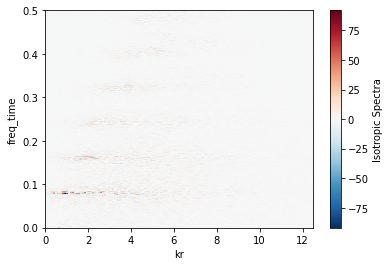

In [18]:
%matplotlib inline
Q29txyiso.plot() 

In [19]:
logQ29spectra = np.log(Q29txyiso)
logQ29spectra.rename('Log Isotropic Spectra')

<xarray.DataArray 'Log Isotropic Spectra' (freq_time: 1105, kr: 135)>
array([[ 0.33027516,         nan,  0.62938071, ...,         nan,
        -0.75914656,         nan],
       [        nan,  0.62294619,         nan, ...,         nan,
                nan, -0.01264199],
       [        nan,  0.966255  ,         nan, ..., -0.33875935,
                nan,         nan],
       ...,
       [-3.63158703,         nan, -1.93865812, ..., -0.92039987,
                nan, -0.03311867],
       [        nan,         nan, -2.16750382, ...,         nan,
        -1.41219562,         nan],
       [        nan, -1.82638602,         nan, ...,         nan,
        -0.05486667,         nan]])
Coordinates:
  * freq_time  (freq_time) float64 0.0 0.0004529 0.0009058 ... 0.4991 0.4995 0.5
  * kr         (kr) float64 0.04622 0.1387 0.2311 0.3235 ... 12.25 12.34 12.43

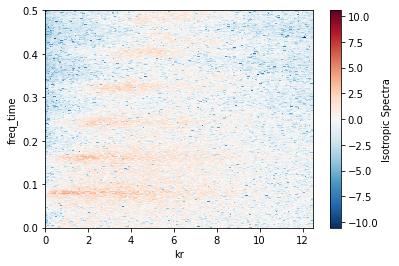

In [20]:
%matplotlib inline
logQ29spectra.plot() 

Conclusions pertaining to this notebook:
1. LEARN DASK 
1.5 FINISH ISOTROPIZING CODE
2. So according to Andrea, we should integrate to just pblh and no more. But we will check it in atmosphere and ocean.
3. To evaluate, we look at vertical heat flux (<w'T'>)
 - So calculate W' and T' over some chosen length scale and then average in space
 - might be good to look at spectra of this
4. Look at less than 100km,  AWAY FROM COASTS to avoid effects of turbulence going much farther up than the pbl

11/19 I'll figure out the fourier stuff later, let me just do the spatial averaging of this

In [28]:
Q29= W29prime*T29prime
Q29.sizes

Frozen({'time': 2208, 'lat': 300, 'lon': 625})

In [72]:
Q.Zlayers.size

2

In [76]:
lengthscale = 12 # 12*0.04 = 0.48 degrees
latsize = int(Q.lat.size/12)
lonsize = int(Q.lon.size/15)
Qcg30 = xr.DataArray(data = np.empty([2208]), dims = 'time')
for i in range(0,latsize):
    for j in range(0,lonsize):
        Qcg30 += Q.isel(lat=slice(i*12,(i+1)*12), lon=slice(j*15,(j+1)*15), Zlayers=0).mean(dim=['lat','lon']) / ((latsize)*(lonsize))

In [82]:
Qcg = xr.concat([Qcg26, Qcg27], dim='Zlayers')

In [98]:
lengthscale = 12 # 12*0.04 = 0.48 degrees
latsize = int(Q.lat.size/12)
lonsize = int(Q.lon.size/15)
zsize = Q.Zlayers.size
Qcgk= xr.DataArray(data = np.empty([2208]), dims = 'time')
for k in range(0,zsize):
    for i in range(0,latsize):
        for j in range(0,lonsize):
            Qcgk+= Q.isel(lat=slice(i*12,(i+1)*12), lon=slice(j*15,(j+1)*15), Zlayers=k).mean(dim=['lat','lon']) / ((latsize)*(lonsize))
    Qcg = xr.concat([Qcg,Qcgk],dim='Zlayers')